### 미국 섹터별 & 기간별 누적수익률 백테스팅

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datetime import datetime
import pandas_datareader.data as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
ticker_list = ['XLU','XLV','XLI','JETS','XLB','PAVE','GDX','XLRE','XLK','XLC','XLF','XLE','SOXX',
     'VOX','FDN','XBI','XRT','XLP','XLB','TLT','GLD','SLV','EEM','FXI','EWJ']

In [4]:
start = datetime(2007,1,1)
end = datetime(2020,5,21)

XLU = wb.DataReader('XLU', 'yahoo', start, end)

In [5]:
dates = XLU.index

In [6]:
len(dates)

3370

In [7]:
df1 = pd.DataFrame( index = dates )

In [8]:
from datetime import datetime
import pandas_datareader.data as wb
 
start = datetime(2007,1,1)
end = datetime(2020,5,21)

for ticker in ticker_list :
     df1[ticker] = wb.DataReader(ticker, 'yahoo', start, end)['Open']

In [9]:
df1.head()

,XLU,XLV,XLI,JETS,XLB,PAVE,GDX,XLRE,XLK,XLC,...,FDN,XBI,XRT,XLP,TLT,GLD,SLV,EEM,FXI,EWJ
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,36.410000,33.700001,35.130001,NaN,34.849998,NaN,40.189999,NaN,23.360001,NaN,...,22.700001,15.466666,20.635000,26.070000,89.220001,63.580002,12.996,38.666668,38.500000,56.840000
2007-01-04,36.860001,33.700001,35.080002,NaN,34.580002,NaN,38.099998,NaN,23.320000,NaN,...,22.770000,15.316667,20.450001,26.240000,89.220001,62.070000,12.604,38.083332,37.450001,56.840000
2007-01-05,36.669998,33.910000,35.080002,NaN,34.369999,NaN,36.650002,NaN,23.520000,NaN,...,22.990000,15.443334,20.650000,26.340000,88.800003,60.750000,12.363,37.466667,36.786667,56.439999
2007-01-08,35.970001,33.750000,34.869999,NaN,34.240002,NaN,37.299999,NaN,23.500000,NaN,...,22.870001,15.500000,20.344999,26.059999,89.120003,60.380001,12.226,36.959999,35.866665,56.279999
2007-01-09,35.939999,33.919998,35.200001,NaN,34.299999,NaN,36.750000,NaN,23.530001,NaN,...,22.900000,15.583333,20.540001,26.200001,89.480003,60.139999,12.195,36.733334,35.543335,56.599998


In [10]:
df2 = df1.pct_change()

In [11]:
df3 = df2.fillna(0)

In [12]:
df3.head()

,XLU,XLV,XLI,JETS,XLB,PAVE,GDX,XLRE,XLK,XLC,...,FDN,XBI,XRT,XLP,TLT,GLD,SLV,EEM,FXI,EWJ
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-01-04,0.012359,0.000000,-0.001423,0.0,-0.007747,0.0,-0.052003,0.0,-0.001712,0.0,...,0.003084,-0.009698,-0.008965,0.006521,0.000000,-0.023750,-0.030163,-0.015086,-0.027273,0.000000
2007-01-05,-0.005155,0.006231,0.000000,0.0,-0.006073,0.0,-0.038058,0.0,0.008576,0.0,...,0.009662,0.008270,0.009780,0.003811,-0.004707,-0.021266,-0.019121,-0.016193,-0.017713,-0.007037
2007-01-08,-0.019089,-0.004718,-0.005986,0.0,-0.003782,0.0,0.017735,0.0,-0.000850,0.0,...,-0.005220,0.003669,-0.014770,-0.010630,0.003604,-0.006091,-0.011081,-0.013523,-0.025009,-0.002835
2007-01-09,-0.000834,0.005037,0.009464,0.0,0.001752,0.0,-0.014745,0.0,0.001277,0.0,...,0.001312,0.005376,0.009585,0.005372,0.004040,-0.003975,-0.002536,-0.006133,-0.009015,0.005686


In [13]:
df3.add(1).cumprod().tail().to_excel('./test.xlsx')

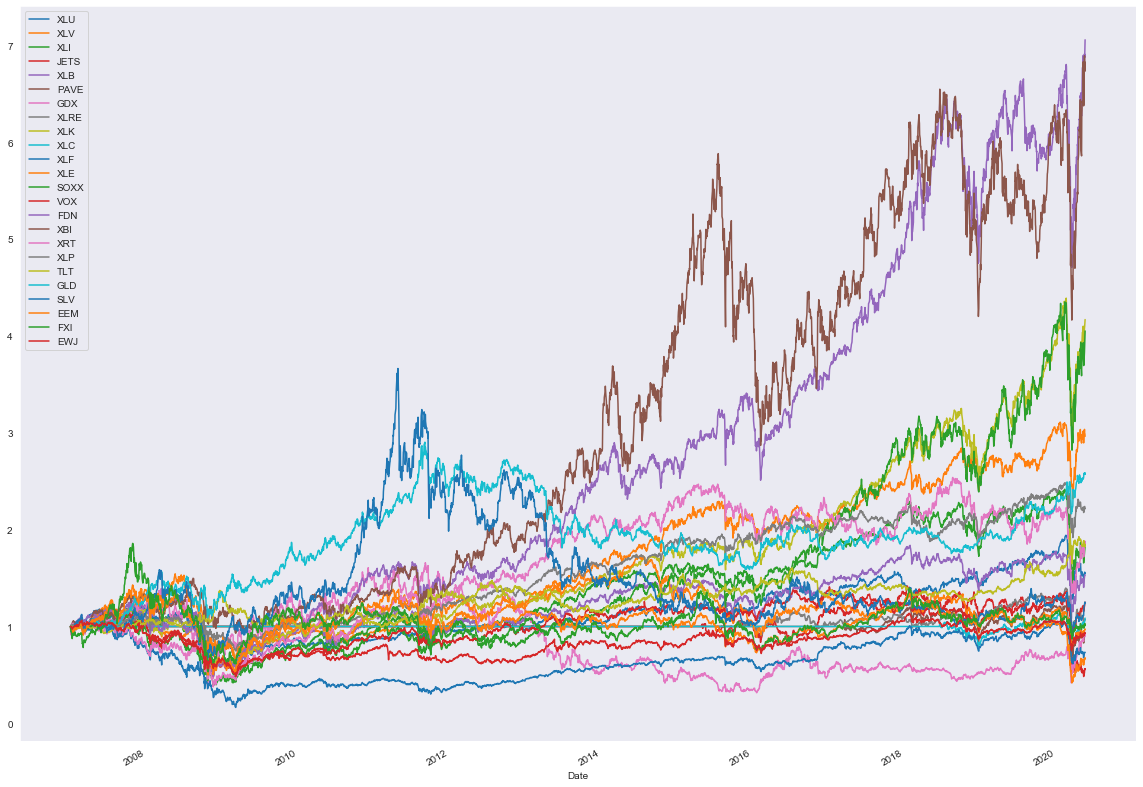

In [14]:
# 1등 - FDN (US IT 섹터) / 2등 - XBI (US 바이오 섹터)
sns.set_style('dark')
df3.add(1).cumprod().plot(figsize = (20, 15) )

### 한글폰트로 바꾸기

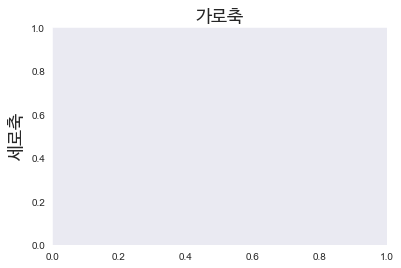

In [15]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\NanumBarunGothic.ttf'
fontprop =fm.FontProperties(fname = path, size = 18)
plt.ylabel('세로축', fontproperties=fontprop)
plt.title('가로축', fontproperties=fontprop)
plt.show()


### US 섹터별 2007-2020 누적수익률

In [16]:
US__sector = ['XLU','XLV','XLI','PAVE','XLRE','XLK','XLC','XLF','XLE','SOXX','VOX','FDN','XBI','XRT','XLP','XLB']

In [17]:
US__sector_N = ['US 유틸리티 섹터','US 헬스케어 섹터', 'US 제조업 섹터','US 인프라스트럭쳐 섹터', 
                'US 부동산 섹터', 'US 기술주 섹터', 'US 커뮤니케이션 섹터', 'US 금융 섹터',
                'US 에너지 섹터', 'US 반도체 섹터', 'US 통신 섹터', 'US IT 섹터', 'US 바이오 섹터', 
                'US 경기소비재 섹터', 'US 필수소비재 섹터', 'US 기초소재 섹터']

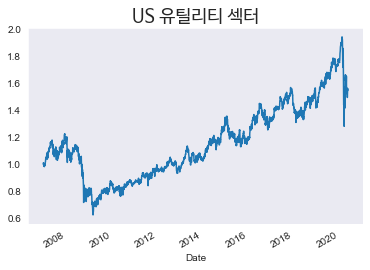

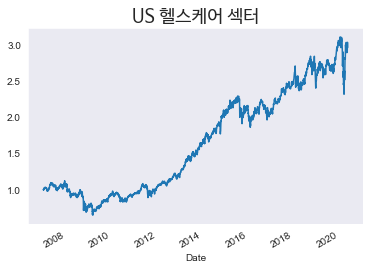

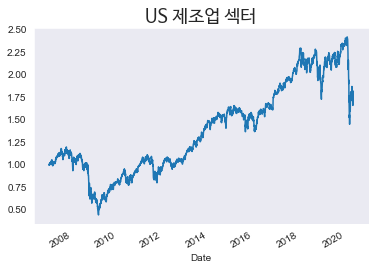

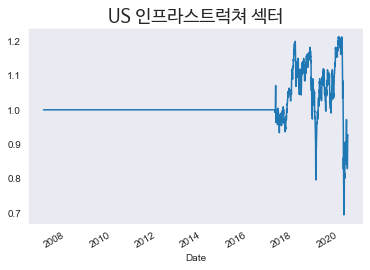

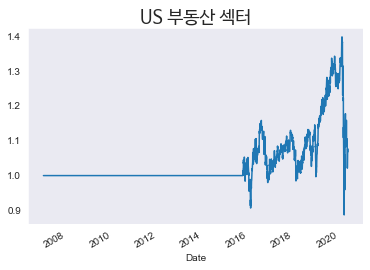

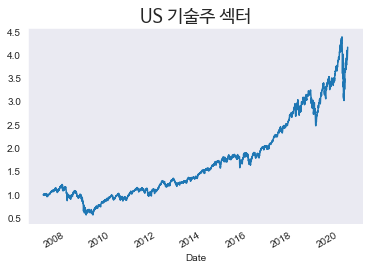

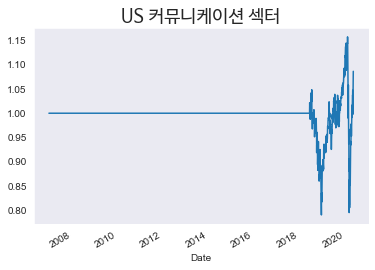

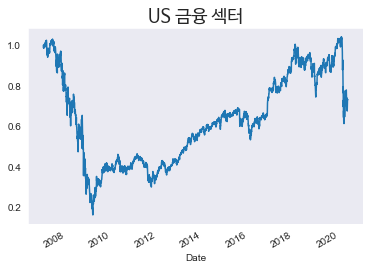

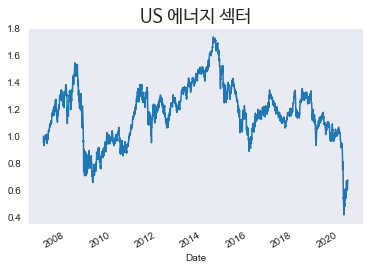

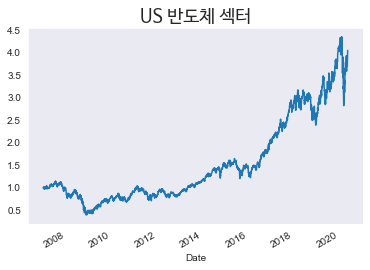

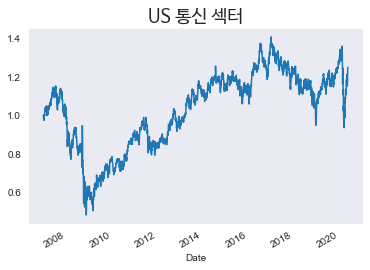

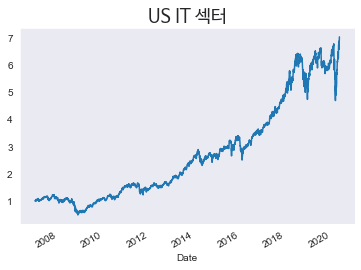

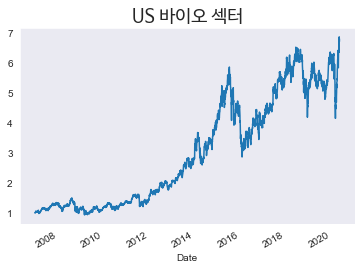

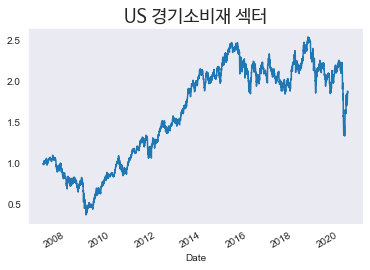

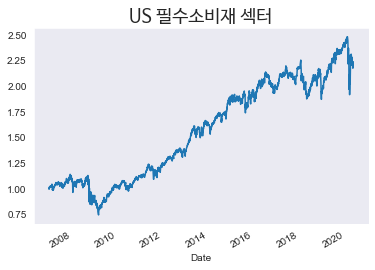

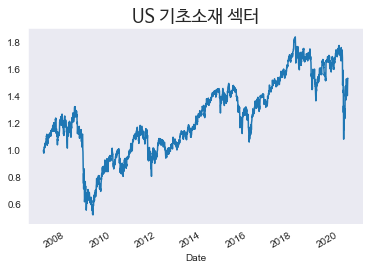

In [18]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\NanumBarunGothic.ttf'
fontprop =fm.FontProperties(fname = path, size = 18)
for sector, i, j in zip(US__sector,list(range(0,16)),US__sector_N) :
    plt.figure(i)
    plt.title(j, fontproperties=fontprop)
    df3[sector].add(1).cumprod().plot()

### US 섹터별 2017-2020 누적수익률

In [19]:
df4 = df3.loc['2017':'2020']

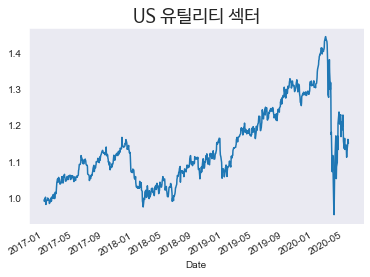

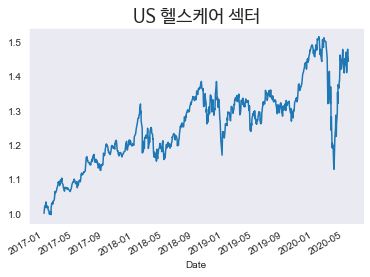

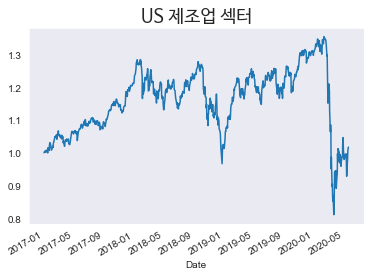

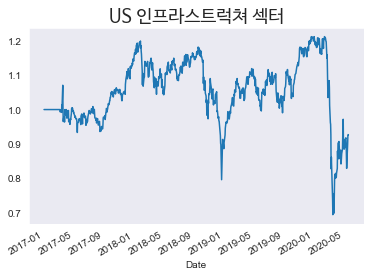

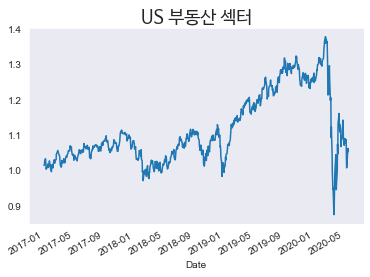

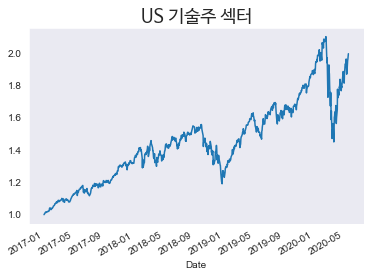

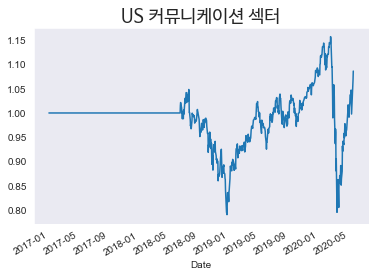

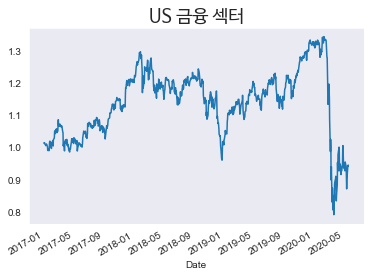

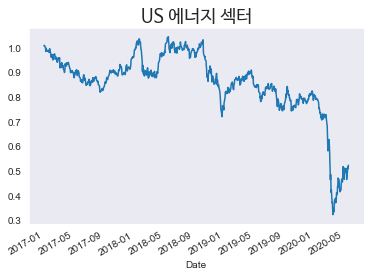

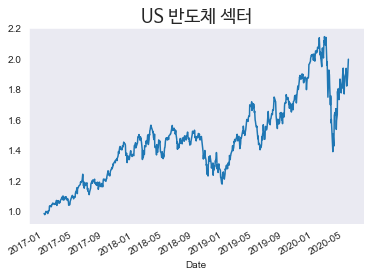

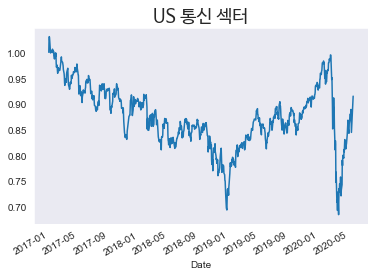

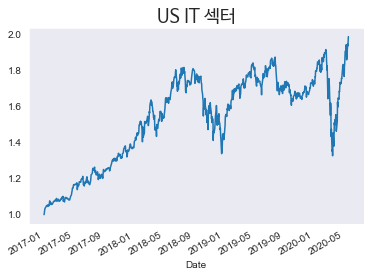

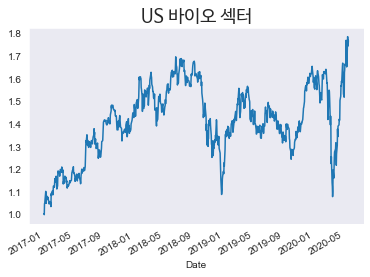

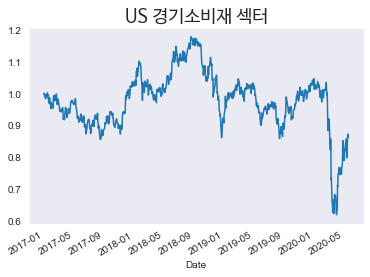

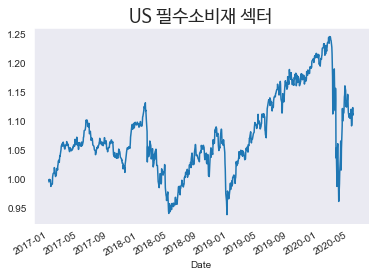

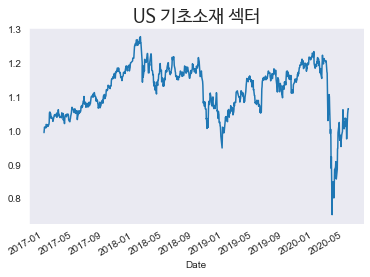

In [20]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\NanumBarunGothic.ttf'
fontprop =fm.FontProperties(fname = path, size = 18)
for sector, i, j in zip(US__sector,list(range(0,16)),US__sector_N) :
    plt.figure(i)
    plt.title(j, fontproperties=fontprop)
    df4[sector].add(1).cumprod().plot()